In [1]:
##run these commands in case you run into an import error meaning you don't have the libraries installed
##this means that you should remove all the hashtag "#" from the following 5 lines in this cell
#!pip install tensorflow
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install random

2024-05-09 20:50:53.382648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 20:50:53.382716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 20:50:53.384451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 573.0032 - val_loss: 617.9927
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 550.3199 - val_loss: 592.0807
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 489.2854 - val_loss: 557.5672
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 490.8444 - val_loss: 510.2619
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 433.8556 - val_loss: 447.0477
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 397.1059 - val_loss: 367.2906
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 314.6935 - val_loss: 277.4972
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 235.4093 - val_loss: 194.7253
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168.7112 - val_loss: 131.9029
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.9315 - val_loss: 97.5448
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.4397 - val_loss: 85.5710
Epoch 12/100
11/11 ━━

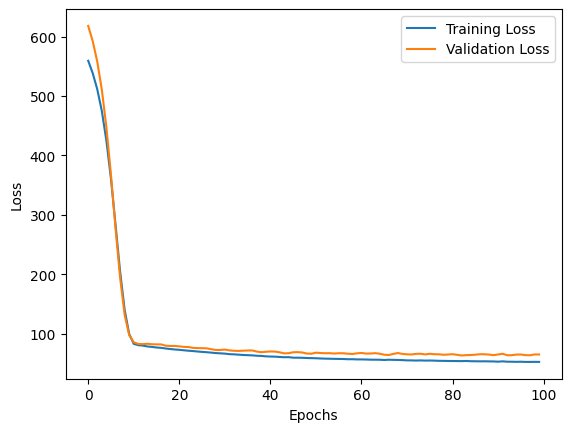

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2524 
Test Loss: 55.981815338134766
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


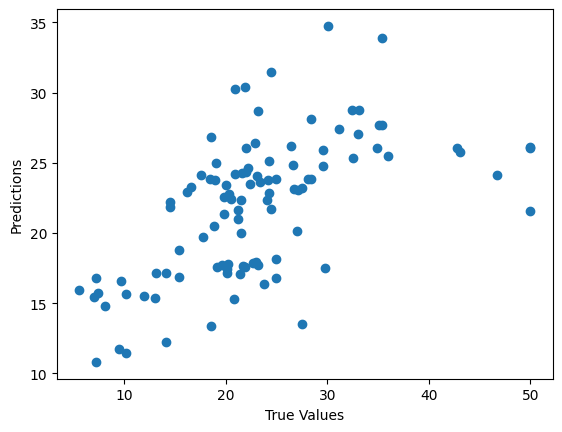

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


the real house value was  7.2
your model predicted its price to be  10.81171 

the real house value was  18.8
your model predicted its price to be  20.474789 

the real house value was  19.0
your model predicted its price to be  24.978252 

the real house value was  27.0
your model predicted its price to be  20.159954 

the real house value was  22.2
your model predicted its price to be  24.622093 

the real house value was  24.5
your model predicted its price to be  21.717539 

the real house value was  31.2
your model predicted its price to be  27.424921 

the real house value was  22.9
your model predicted its price to be  26.387238 

the real house value was  20.5
your model predicted its price to be  22.452406 

the real house value was  23.2
your model predicted its price to be  17.709686 

the real house value was  18.6
your model predicted its price to be  13.343258 

the real house value was  14.5
your model predicted its price to be  22

In [2]:
# Import necessary libraries for processing
import tensorflow as tf # for neural networks and deep learning
import numpy as np # for perfoming mathematical operations if necessary
import matplotlib.pyplot as plt # for visualization and plots and graphs

# Load the dataset, containing houses information and their prices
# Xs are the information and Ys are the house prices

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
#the target of this dataset is to be able to predict the values of the prices from their info.


# Normalize the data (scaling to make all features within a similar range for distance normalization)
x_train_normalized = tf.keras.utils.normalize(x_train, axis=-1)
x_test_normalized = tf.keras.utils.normalize(x_test, axis=-1)

# Define the model architecture
model = tf.keras.models.Sequential([
    # Input layer with 13 neurons, one for each feature in the dataset
    tf.keras.layers.Input(shape=(x_train_normalized.shape[1],)),
    
    # the following are the hidden layers
    # feel free to add more layers the same way or change the value of 64
    # the value of 64 here in the number of neurons in each layer
    # feel free to increase or decrease it
    # but try to keep it something between 10 and 1024
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # the following is the output layer
    # Output layer with 1 neuron (for regression) and linear activation function
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model, make it ready for training
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and save it's states during training for later analysis
history = model.fit(x_train_normalized, y_train, epochs=100, validation_split=0.2, shuffle=True)

# Plot ( visualize ) training and validation loss (error in predictions)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data --> map input to output and check the error
test_loss = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)

# Make predictions
predictions = model.predict(x_test_normalized)

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()




# Make predictions and print some values of predictions vs the real values
predictions = model.predict(x_test_normalized)
print('\n')
for i in range(0, 20):
    print("the real house value was ", y_test[i])
    print("your model predicted its price to be ", predictions[i][0], '\n')

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6017 - loss: 1.0628 - val_accuracy: 0.0000e+00 - val_loss: 1.2889
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8375 - loss: 1.0280 - val_accuracy: 0.0000e+00 - val_loss: 1.3654
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8687 - loss: 0.9888 - val_accuracy: 0.0000e+00 - val_loss: 1.4558
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8010 - loss: 0.9976 - val_accuracy: 0.0000e+00 - val_loss: 1.5056
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8271 - loss: 0.9588 - val_accuracy: 0.0000e+00 - val_loss: 1.5628
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8385 - loss: 0.9268 - val_accuracy: 0.0000e+00 - val_loss: 1.6082
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8135 - loss: 0.9221 - val_accuracy: 0.0000e+00 - val_loss: 1.6255
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8062 - loss: 0.9035 - val_acc

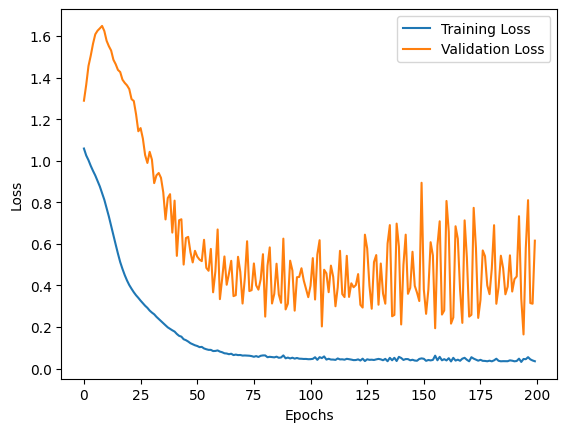

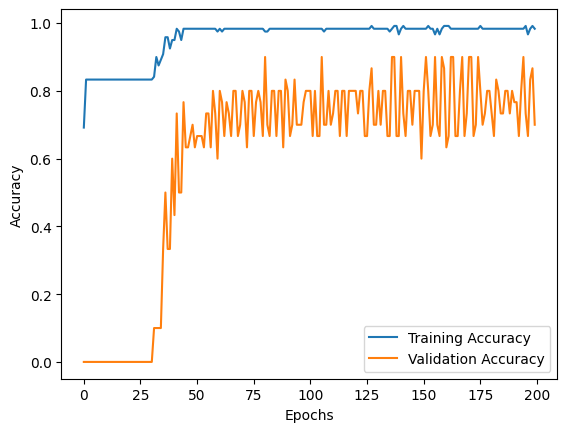

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Some predictions vs real values:
Real class: 0  While your model Predicted class: 0 

Real class: 1  While your model Predicted class: 1 

Real class: 1  While your model Predicted class: 1 

Real class: 1  While your model Predicted class: 1 

Real class: 1  While your model Predicted class: 1 

Real class: 2  While your model Predicted class: 2 

Real class: 2  While your model Predicted class: 1 

Real class: 2  While your model Predicted class: 2 

Real class: 0  While your model Predicted class: 0 

Real class: 2  While your model Predicted class: 1 



In [3]:
# Import necessary libraries for processing
import tensorflow as tf # for neural networks and deep learning
import numpy as np # for performing mathematical operations if necessary
import matplotlib.pyplot as plt # for visualization and plots and graphs
from sklearn.datasets import load_iris # for loading the iris flower dataset

# Load the Iris dataset
# the target here is to know which of the 3 kinds of iris flower this is from the data
# this is what is called classification
iris = load_iris()
#x_train is information about the flower, y_train is it's type
x_train, y_train = iris.data, iris.target

# Normalize the data (scaling to make all features within a similar range)
x_train_normalized = tf.keras.utils.normalize(x_train, axis=-1)

# Define the model architecture
model = tf.keras.models.Sequential([
    # Input layer with 4 neurons, one for each feature in the dataset
    tf.keras.layers.Input(shape=(x_train_normalized.shape[1],)),
    
    # the following are the hidden layers
    # feel free to add more layers the same way or change the value of 64
    # the value of 64 here in the number of neurons in each layer
    # feel free to increase or decrease it
    # but try to keep it something between 10 and 1024
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer
    # Output layer with 3 neurons (one for each class{type of irirs})
    # and softmax activation function for classification
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model, make it ready for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and save it's states during training for later analysis
history = model.fit(x_train_normalized, y_train, epochs=200, validation_split=0.2, shuffle=True)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(x_train_normalized)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Print some predictions vs the real types
print('\nSome predictions vs real values:')
import random # for selecting a random sample to test on
for i in range(10):
    index = random.randint(1, len(y_train)) - 1
    print("Real class:", y_train[index], " While your model Predicted class:", predicted_classes[index], '\n')
